In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [4]:
def add_counts_to_heatmap(ax, xedges, yedges, hist):
    # 각 셀에 빈도수 표시
    for i in range(len(xedges) - 1):
        for j in range(len(yedges) - 1):
            count = int(hist[i, j])
            if count > 0:
                ax.text(xedges[i] + 0.5 * (xedges[i+1] - xedges[i]), 
                        yedges[j] + 0.5 * (yedges[j+1] - yedges[j]), 
                        str(int(hist[i, j])), 
                        ha='center', va='center', color='black')

In [5]:
def draw_head(num_samples, percent_sets):
    range_sets = [[-45,-25],[-25,0],[0,25],[25,45]]
    roll_range_set = [[-30,-15],[-15,0],[0,15],[15,30]]
    all_samples = []
    for roll_num, roll_range_set in enumerate(roll_range_set):
        for pitch_num, pitch_range_set in enumerate(range_sets):
            for yaw_num, yaw_range_set in enumerate(range_sets):
                roll_min = roll_range_set[0]
                roll_max = roll_range_set[1]
                pitch_min = pitch_range_set[0]
                pitch_max = pitch_range_set[1]
                yaw_min = yaw_range_set[0]
                yaw_max = yaw_range_set[1]
                precent = precent_sets[roll_num][pitch_num][yaw_num]
                num_samples_range = int(num_samples * precent)
                range_roll_pitch_yaw = np.column_stack([
                    np.random.uniform(roll_min, roll_max, (num_samples_range,)),
                    np.random.uniform(pitch_min, pitch_max, (num_samples_range,)),
                    np.random.uniform(yaw_min, yaw_max, (num_samples_range,))
                ])

                # print(range_roll_pitch_yaw)
                # 각 범위의 데이터를 합침
                all_samples.append(range_roll_pitch_yaw)
    
    roll_pitch_yaw_data = np.vstack(all_samples)
    fig, axs = plt.subplots(3, 1, figsize=(20, 30))
    
    roll = roll_pitch_yaw_data[:, 0]
    pitch = roll_pitch_yaw_data[:, 1]
    yaw = roll_pitch_yaw_data[:, 2]
    # roll 값과 pitch 값에 대한 2차원 히스토그램
    
    hist, x_edges, y_edges = np.histogram2d(roll, pitch, bins=18, range=[[-45, 45], [-45, 45]])
    axs[0].imshow(hist.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', cmap='Reds', norm=LogNorm())
    axs[0].set_xlabel('Roll')
    axs[0].set_ylabel('Pitch')
    add_counts_to_heatmap(axs[0], x_edges, y_edges, hist)

    # pitch 값과 yaw 값에 대한 2차원 히스토그램
    
    hist, x_edges, y_edges = np.histogram2d(yaw, pitch, bins=18, range=[[-45, 45],[-45, 45]])
    axs[1].imshow(hist.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', cmap='Blues', norm=LogNorm())
    axs[1].set_xlabel('Yaw')
    axs[1].set_ylabel('Pitch')
    add_counts_to_heatmap(axs[1], x_edges, y_edges, hist)

    # yaw 값과 roll 값에 대한 2차원 히스토그램
    hist, x_edges, y_edges = np.histogram2d(yaw, roll, bins=18, range=[[-45, 45], [-45, 45]])
    axs[2].imshow(hist.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', cmap='Greens', norm=LogNorm())
    axs[2].set_xlabel('Yaw')
    axs[2].set_ylabel('Roll')
    add_counts_to_heatmap(axs[2], x_edges, y_edges, hist)

    plt.subplots_adjust(hspace=0.3)  # 서브 플롯 간의 수직 간격 조정
    # plt.savefig(save_name)

    plt.show()

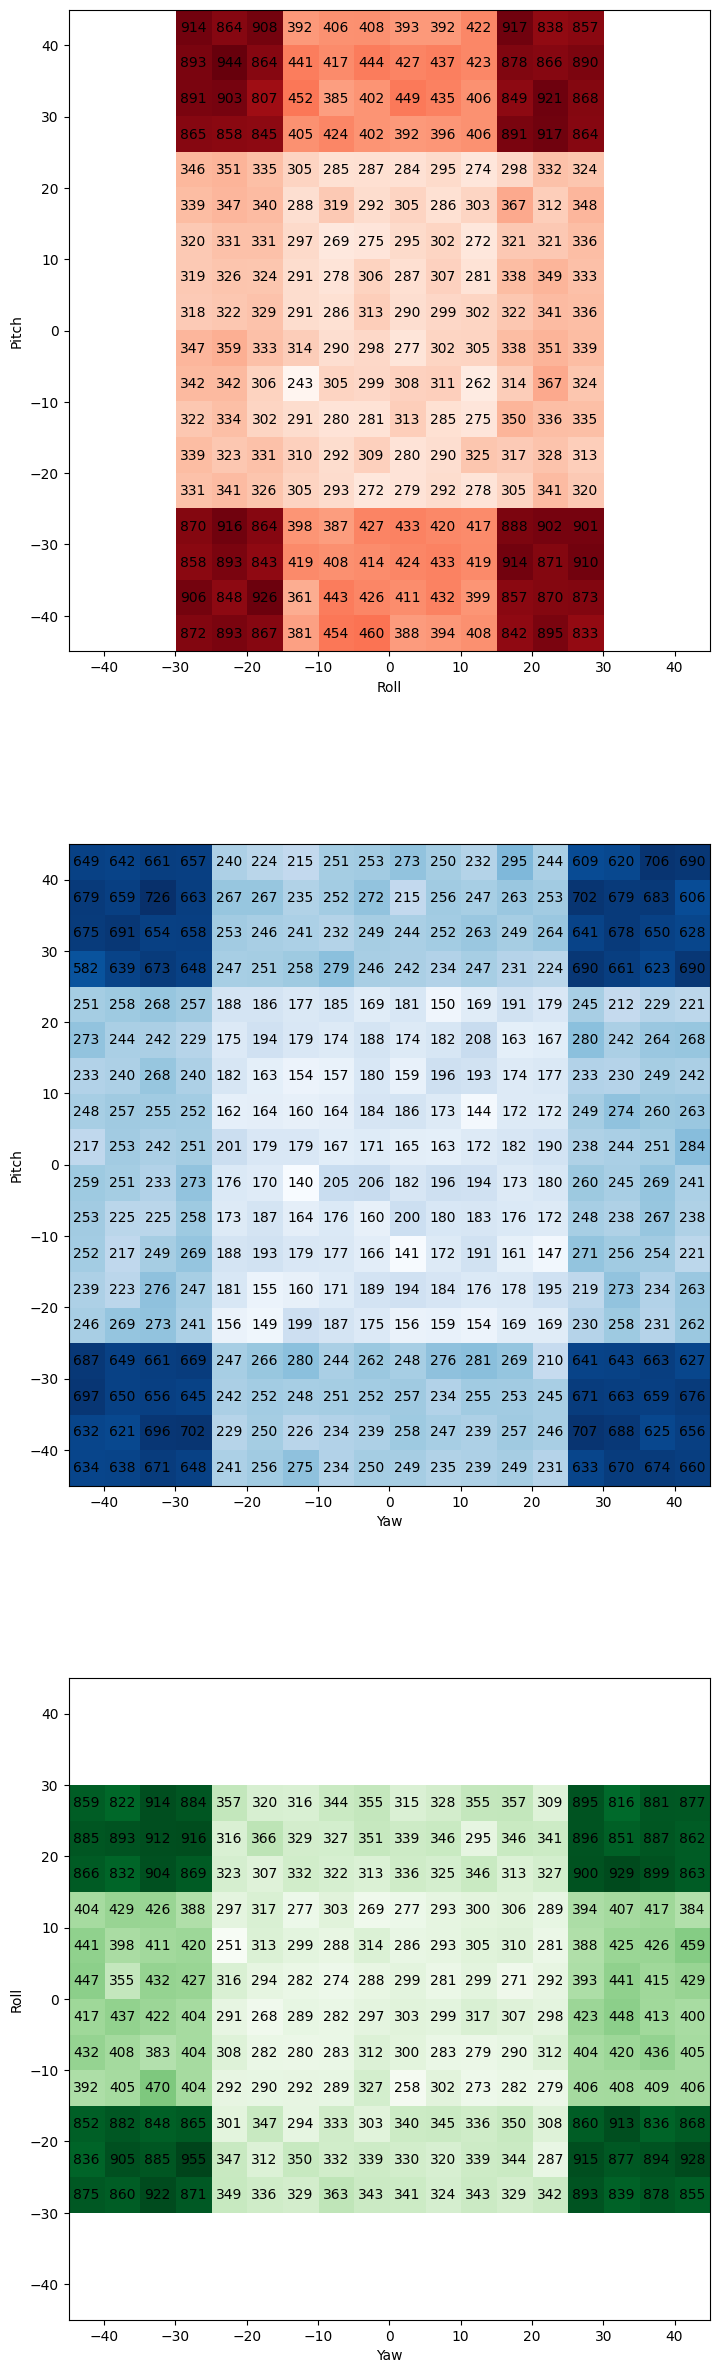

In [7]:
precent_sets = [[[0.040, 0.013, 0.013, 0.040],[0.013, 0.012, 0.012, 0.013],[0.013, 0.012, 0.012, 0.013],[0.040, 0.013, 0.013, 0.040]],
                [[0.013, 0.012, 0.012, 0.013],[0.012, 0.010, 0.010, 0.012],[0.012, 0.010, 0.010, 0.012],[0.013, 0.012, 0.012, 0.013]],
                [[0.013, 0.012, 0.012, 0.013],[0.012, 0.010, 0.010, 0.012],[0.012, 0.010, 0.010, 0.012],[0.013, 0.012, 0.012, 0.013]],
                [[0.040, 0.013, 0.013, 0.040],[0.013, 0.012, 0.012, 0.013],[0.013, 0.012, 0.012, 0.013],[0.040, 0.013, 0.013, 0.040]]]

draw_head(99600,precent_sets)